# Desafio IA - Questão 1 

***Developed by***: Larissa Lorenzi

***Date:*** Fev,/2023

# Imports / bibliotecas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (6.0, 5.0)

#setup the rows and cols dimension
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 1000)

#to change the scientific notation precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings('ignore')

path = os.environ['USERPROFILE']
path

'C:\\Users\\loren'

In [2]:
#buscar o arquivo da tabela e visualizar a estrutura da tabela

df = pd.read_csv(path + '\Desktop\DESAFIO_IA\ia_vende_normalmente.csv', sep=';')
df.head()

,venda_id,cliente_id,nome_cliente,data_hora_venda,valor_venda,Unnamed: 5
0,1,17012022,IA Blu Ltda,17/01/2018 09:00,"R$ 171,04",NaN
1,2,17012022,IA Blu Ltda,22/01/2018 12:52,"R$ 80,57",NaN
2,3,17012022,IA Blu Ltda,27/01/2018 18:33,"R$ 83,79",NaN
3,4,17012022,IA Blu Ltda,01/02/2018 17:27,"R$ 77,94",NaN
4,5,17012022,IA Blu Ltda,09/02/2018 08:57,"R$ 147,15",NaN


**Função para melhorar a acurácia dos gráficos**

<h3>Integridade dos dados</h3>

In [3]:
df.shape

(293, 6)

In [4]:
df.info()

#tem uma coluna 'Unnamed' que só tem valores nulos e pode ser eliminada
#o nome da coluna 'valor_venda' tem um espaço a mais no início e deve ser ajustada para não atrapalhar a exploração
#há três colunas definidas como tipo 'object', quando deveriam estar com definições mais específicas
#observando as cinco primeiras linhas cima, será necessário retirar as cifras da coluna 'valor_venda' para transformara em numérica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   venda_id         293 non-null    int64  
 1   cliente_id       293 non-null    int64  
 2   nome_cliente     293 non-null    object 
 3   data_hora_venda  293 non-null    object 
 4    valor_venda     293 non-null    object 
 5   Unnamed: 5       0 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 13.9+ KB


In [5]:
df = df.dropna(how='all', axis='columns')

#drop da coluna vazia

In [6]:
df = df.rename(columns = {' valor_venda ': 'valor_venda'})

#ajuste na nomenclatura da coluna

In [7]:
df['valor_venda'] = df['valor_venda'].str.replace(',', '.')

df['valor_venda'].head(10)

#trocar as vírgulas por pontos, visto que são o padrão decimal da linguagem

0     R$ 171.04 
1      R$ 80.57 
2      R$ 83.79 
3      R$ 77.94 
4     R$ 147.15 
5      R$ 34.51 
6     R$ 234.01 
7     R$ 141.49 
8     R$ 190.11 
9      R$ 69.25 
Name: valor_venda, dtype: object

In [8]:
df['valor_venda'] = df['valor_venda'].str.extract('(\d+\.\d+)', expand=False)

df['valor_venda'].head(10)

#retirando os símbolos e espaços para deixar somente números e decimais

0    171.04
1     80.57
2     83.79
3     77.94
4    147.15
5     34.51
6    234.01
7    141.49
8    190.11
9     69.25
Name: valor_venda, dtype: object

In [9]:
df['valor_venda'] = pd.to_numeric(df['valor_venda'])
df['data_hora_venda'] =  pd.to_datetime(df['data_hora_venda'])

#transformando a coluna de object para float
#e a coluna data_hora_venda de object para datetime

In [10]:
df.info()

#TABELA ATUALIZADA:
#sem a coluna inútil
#com a nomenclatura correta da coluna valor_venda
#valores da coluna valor_venda realmente são números agora
#coluna data_hora_venda realmente é data agora

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   venda_id         293 non-null    int64         
 1   cliente_id       293 non-null    int64         
 2   nome_cliente     293 non-null    object        
 3   data_hora_venda  293 non-null    datetime64[ns]
 4   valor_venda      293 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 11.6+ KB


In [11]:
df[['venda_id', 'nome_cliente']].nunique()

#confirmando se não há duplicidade na tabela, visto que a venda_id é a chave única
#confirmando quantos clientes únicos há na tabela

venda_id        293
nome_cliente      1
dtype: int64

In [12]:
df = df.sort_values(by = 'data_hora_venda')

In [13]:
df['dias_desde_ultima_venda'] = df.groupby('cliente_id')['data_hora_venda'].diff().apply(lambda x: x.days)

#diferença não cumulativa entre datas no grupo (somente um, nesse caso)

In [14]:
df['data_hora_venda'].shift().cumsum()

#para obter uma soma cumulativa dessa diferença

3                               NaT
17    1725-09-23 17:39:43.145224192
22    1773-09-28 03:19:43.145224192
0     1821-10-04 14:35:43.145224192
1     1869-10-20 23:35:43.145224192
                   ...             
288   2169-12-16 21:52:14.115985408
289   2222-10-05 05:07:14.115985408
254   1691-01-09 15:43:40.406433792
272   1743-11-14 02:12:40.406433792
292   1796-09-19 22:43:40.406433792
Name: data_hora_venda, Length: 293, dtype: datetime64[ns]

In [15]:
df.loc[:, 'dias_desde_ultima_venda'] = df.groupby(['cliente_id', df['data_hora_venda'].shift().cumsum()])['dias_desde_ultima_venda'].cumsum()

In [16]:
df.head()

,venda_id,cliente_id,nome_cliente,data_hora_venda,valor_venda,dias_desde_ultima_venda
3,4,17012022,IA Blu Ltda,2018-01-02 17:27:00,77.94,NaN
17,18,17012022,IA Blu Ltda,2018-01-05 09:40:00,173.02,2.00
22,23,17012022,IA Blu Ltda,2018-01-06 11:16:00,158.84,1.00
0,1,17012022,IA Blu Ltda,2018-01-17 09:00:00,171.04,10.00
1,2,17012022,IA Blu Ltda,2018-01-22 12:52:00,80.57,5.00


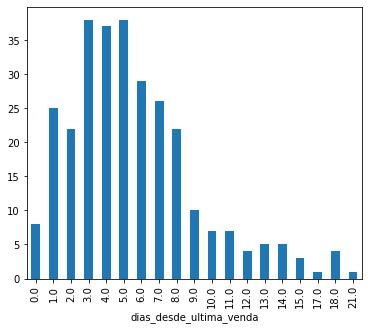

In [17]:
group1 = df.groupby('dias_desde_ultima_venda').count()['venda_id'].plot(kind='bar')

#o máximo de dias sem vendas foram 21
#os dias sem vendas mais frequentes são de 3 a 5 dias

#o volume de dados se  de forma decrescente
#não houve casos em que se passaram 29 dias sem vendas, portanto, quando um evento é igual ao conjunto vazio, ele é chamado de evento impossível e possui 0% de probabilidade de ocorrência

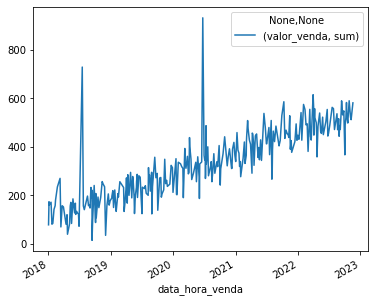

In [18]:
df2 = df.groupby(['data_hora_venda']).agg({'valor_venda': ['sum']})

pl = df2.plot()

#é possível perceber uma tendência de aumento nas vendas ao longo do tempo desde o início da operação


# Treinamento e teste
 

In [19]:
A = df.drop(['venda_id' , 'cliente_id', 'nome_cliente', 'dias_desde_ultima_venda'], axis=1)
A[:3]

#remoção das colunas não úteis para o modelo em questão

,data_hora_venda,valor_venda
3,2018-01-02 17:27:00,77.94
17,2018-01-05 09:40:00,173.02
22,2018-01-06 11:16:00,158.84


In [20]:
X = A.data_hora_venda

y = A.valor_venda

In [21]:
from sklearn.model_selection import train_test_split

#foi escolhido aprendizado supervisionado porque temos um conjunto de entradas

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#separação dos dados de teste e treinamento
#como são poucos dados, foi deixado 30% dos dados para teste

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

#como é uma predição de valor contínuo e nem classes, foi utilizada regressão linear

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(pd.DataFrame(X_train))
X_test = scaler.fit_transform(pd.DataFrame(X_test))

In [26]:
X_train.reshape(-1, 1)
X_test.reshape(-1, 1)

array([[ 0.51851194],
       [ 0.68732241],
       [-0.16489845],
       [ 0.37542986],
       [ 0.56051483],
       [ 1.64401746],
       [-1.22656883],
       [ 1.04287016],
       [ 0.83360143],
       [ 0.18804522],
       [-0.411047  ],
       [-1.47831634],
       [ 1.03340429],
       [ 1.60743009],
       [-1.63637021],
       [ 0.82666519],
       [-1.09046021],
       [-0.10878914],
       [-0.18268833],
       [ 1.45326041],
       [-1.37024111],
       [-1.67428819],
       [-0.0924402 ],
       [ 1.66216492],
       [ 0.50424334],
       [ 0.21994418],
       [-0.51789795],
       [-1.11059629],
       [-0.10097956],
       [ 0.90918882],
       [ 1.29936058],
       [ 1.40285508],
       [-1.60031987],
       [-1.37393654],
       [ 1.69216965],
       [ 0.4014188 ],
       [-0.99542398],
       [-1.29671279],
       [-1.53610987],
       [-1.20982111],
       [ 0.7004425 ],
       [ 1.46078153],
       [ 0.47736112],
       [ 0.90705265],
       [-0.24704589],
       [-0

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
#Training  the Xtrain and ytrain
model.fit(X_train, y_train)

#Predictions Xtest
y_predicton = model.predict(X_test)

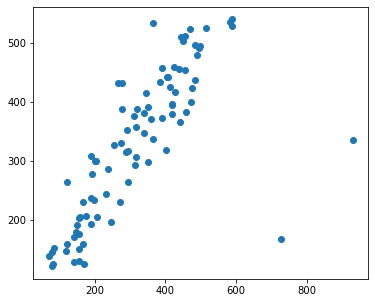

In [33]:
plt.scatter(y_test, y_predicton)

(array([ 8., 40., 34.,  4.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-167.2320126 ,  -91.02209099,  -14.81216937,   61.39775224,
         137.60767386,  213.81759547,  290.02751709,  366.2374387 ,
         442.44736032,  518.65728193,  594.86720355]),
 <BarContainer object of 10 artists>)

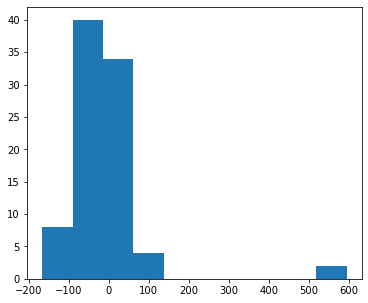

In [34]:
plt.hist(y_test - y_predicton)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from numpy import sqrt

In [36]:
# Model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_predicton))
print('Mean absolute error (MAE): %.3f'% mean_absolute_error(y_test, y_predicton))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_predicton))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_predicton)) )

Coefficients: [124.04812343]
Intercept: 329.6747317073167
Coefficient of determination (R^2): 0.548
Mean absolute error (MAE): 59.555
Mean squared error (MSE): 11017.563
Root mean squared error (RMSE) : 104.965


In [37]:
print(y_predicton[:15])

[393.99516423 414.93578694 309.21938821 376.24610132 399.2055443
 533.6120126  177.52116988 459.04081822 433.08142445 353.00138845
 278.6851231  146.29236332 457.86659464 529.07341835 126.68607808]


In [39]:
print('Accuracy of Linear Regression on training set: {:.2f}'.format(model.score(X_train, y_train) * 100) ,'\nAccuracy of Linear Regression on test set: {:.2f}'.format(model.score(X_test, y_test) * 100))

Accuracy of Linear Regression on training set: 82.24 
Accuracy of Linear Regression on test set: 54.83
